# Initial Setup

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

# Bi-gram

A bigram or digram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. A bigram is an n-gram for n=2. The frequency distribution of every bigram in a string is commonly used for simple statistical analysis of text in many applications, including in computational linguistics, cryptography, speech recognition, and so on.

In [ ]:
# obtain the bigrams from a tokenized text 
md_bigrams = list(bigrams(text1))

# Obtain bigram frequency distribution
fdist = FreqDist(md_bigrams)

In [ ]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

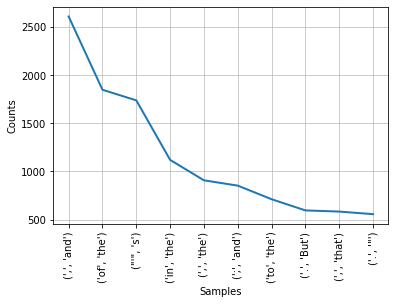

In [ ]:
fdist.plot(10)

# Filtering Bi-grams

* There are bigrams that do not represent basic language structures that are of interest.
* A filter can be applied to prevent this from happening.

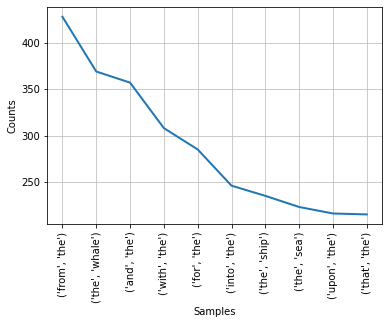

In [ ]:
#Filter the bigrams that have a len greater than a threshold

threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams 
                    if len(bigram[0]) > threshold 
                    and len(bigram[1]) > threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(10)

# Trigrams

Trigrams are a special case of the n-gram, where n is 3. They are often used in natural language processing for performing statistical analysis of texts and in cryptography for control and use of ciphers and codes.

In [ ]:
from nltk.util import ngrams

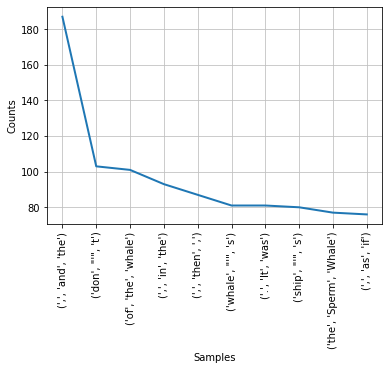

In [ ]:
#Indicate the n-grams number
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)
fdist.plot(10)

# Colocations

In [ ]:
# Use bigrams

md_bigrams = list(bigrams(text1))

#Set a threshold
threshold = 2

#Colocations distribution
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)

#Words distribution
filtered_words = [word for word in text1 if len(word) > threshold]
filtered_word_dist = FreqDist(filtered_words)

#Create a dataframe
df = pd.DataFrame()

#Create a column with the bigrams without repetition
df['bi_grams'] = list(set(filtered_bigrams))

#from the bigram, create one column for each word
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] = df['bi_grams'].apply(lambda x: x[1])

#In the same way, create other columns for the bigram and word distribution
df['bi_gram_freq'] = df['bi_grams'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])

In [ ]:
df.head()

bi_grams word_0  ... word_0_freq  word_1_freq
0  (White, Elephants)  White  ...          89            1
1      (these, fresh)  these  ...         381           32
2    (other, funeral)  other  ...         412            4
3    (hole, prospect)   hole  ...          44            5
4   (the, increasing)    the  ...       13721            5

[5 rows x 6 columns]

In [ ]:
df.shape

(67942, 6)

# Pointwise Mutual Information (PMI)

The idea of PMI is that we want to quantify the likelihood of co-occurrence of two words, taking into account the fact that it might be caused by the frequency of the single words. Hence, the algorithm computes the (log) probability of co-occurrence scaled by the product of the single probability of occurrence as follows:

$PMI = log\left(\frac{P(w_{1},w_{2})}{P(w_{1})P(w_{1})}\right)$

In [ ]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0] / (x.values[1] * x.values[2])), axis = 1)
df['log(bi_gram_freq)'] =  df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

bi_grams     word_0  ...        PMI  log(bi_gram_freq)
0      (White, Elephants)      White  ...  -6.475733           0.000000
1          (these, fresh)      these  ... -13.573647           0.000000
2        (other, funeral)      other  ... -10.686501           0.000000
3        (hole, prospect)       hole  ...  -7.781360           0.000000
4       (the, increasing)        the  ... -16.066026           0.000000
...                   ...        ...  ...        ...                ...
67937        (and, stove)        and  ... -17.015938           0.000000
67938        (this, side)       this  ... -16.437405           1.584963
67939       (steel, went)      steel  ... -11.599913           0.000000
67940   (sometimes, such)  sometimes  ... -14.732167           0.000000
67941       (drink, with)      drink  ... -14.696098           0.000000

[67942 rows x 8 columns]

In [ ]:
df.sort_values(by = 'PMI', ascending= False)

bi_grams      word_0  ...        PMI  log(bi_gram_freq)
35933     (returne, againe)     returne  ...   0.000000                0.0
5548    (Norway, Maelstrom)      Norway  ...   0.000000                0.0
652       (baleful, comets)     baleful  ...   0.000000                0.0
28227      (rigadig, tunes)     rigadig  ...   0.000000                0.0
2727   (dismasting, blasts)  dismasting  ...   0.000000                0.0
...                     ...         ...  ...        ...                ...
21957            (man, the)         man  ... -22.732783                0.0
11              (some, the)        some  ... -22.919024                0.0
41836            (one, the)         one  ... -23.540138                0.0
45765            (the, not)         the  ... -23.851315                0.0
49612            (the, but)         the  ... -23.864336                0.0

[67942 rows x 8 columns]

In [ ]:
fig = px.scatter(x=df['PMI'].values, y=df['log(bi_gram_freq)'], 
                 color = df['PMI'] + df['log(bi_gram_freq)'],
                 hover_name = df['bi_grams'].values, width = 600, height=600,
                 labels = {'x':'PMI','y':'Log(bigram_frequ'})
fig.show()

# Pre-built measurements in NLTK

In [ ]:
#Documentation: https://www.nltk.org/_modules/nltk/metrics/association.html

from nltk.collocations import *

#import the collocation metric
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [ ]:
#Those that are repeated more than 20 times, filter out bigrams with a higher frequency of occurrence. 
finder.apply_freq_filter(20)

In [ ]:
#Best collocations and their respectives candidates
finder.nbest(bigram_measure.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

## Spanish text

In [ ]:
#Download the spanish books
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()

flatten_corpus = [w for l in corpus for w in l]
print(flatten_corpus[:50])

finder =  BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.
['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]